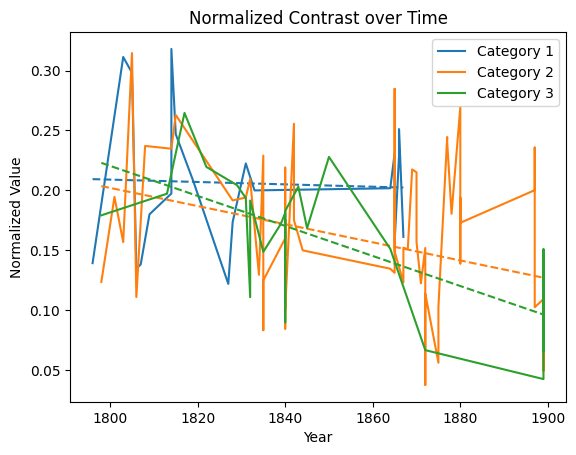

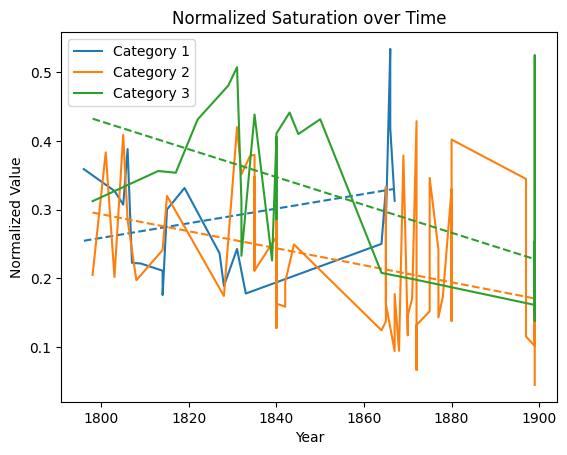

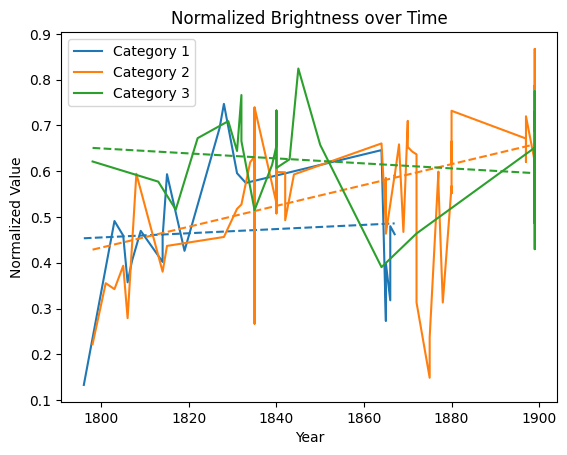

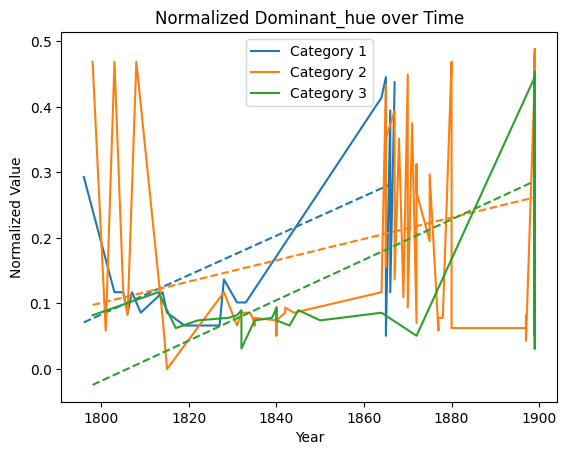

In [12]:
import json
import matplotlib.pyplot as plt
import numpy as np

# load data into a dictionary
with open('data/contrast.json', 'r') as f:
    data = json.load(f)

# Sort the data by year
data.sort(key=lambda d: int(d['Year']))

# plot a chart for each image property
for prop in ['contrast', 'saturation', 'brightness', 'dominant_hue']:
    # create a figure and axis object
    fig, ax = plt.subplots()

    # plot a line for each category
    for cat in range(1, 4):
        # filter data for category
        cat_data = [d for d in data if 'Category' in d and int(d['Category']) == cat]

        # extract year and normalized column for the property, skipping entries without the property field
        year = []
        prop_norm = []

        for d in cat_data:
            if prop in d:
                year.append(int(d['Year']))
                prop_norm.append(float(d[prop]) / 256)

        # plot the data
        ax.plot(year, prop_norm, label='Category {}'.format(cat))

        # also plot the linear trend, in same color but dashed
        z = np.polyfit(year, prop_norm, 1)
        p = np.poly1d(z)
        ax.plot(year, p(year), '--', color=ax.lines[-1].get_color())

    # set chart title and axis labels
    ax.set_title('Normalized {} over Time'.format(prop.capitalize()))
    ax.set_xlabel('Year')
    ax.set_ylabel('Normalized Value')

    # add legend
    ax.legend()

    # display the chart
    plt.show()
